In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45
from functools import partial

R = 8.31
F = 9.648e4
eps0 = 8.854e-12

# Уравнение Нернста-Планка

Описывает поток ионов одного вида через мембрану при наличии градиента концентрации и электрического поля

## Диффузия

> В приближении, где размер частиц примерно равен ширине каналов, задачу диффузии можно считать одномерной

Поток частиц Х через мембрану за счет чистой диффузии описывается законом Фика как:
$$
J_{X, diff} = - D_X \frac{d[X]}{dx}
$$
где:
- $J_{X, diff}$ - диффузный молярный поток через мембрану (molar flux)
- $D_X$ - коэффициэнт диффузии (diffusion coefficient) - \[$\frac{cm^2}{s}$\]
- $\frac{d[X]}{dx}$ - одномерный градиент концентрации Х (concentration gradient)

Знак минус показывает, что поток направлен против градиента концентрации.

## Дрейф в электрическом поле

При приложении электрического поля частицы стремятся двигаться вдоль градиента электростатического поля (направление определяется знаком заряда).

Концентрация ионов обоих знаков примерно равна, так что при движении в противоположные стороны они испытывают столкновения. Столкновения мешают частицам неограниченно ускоряться в электрическом поле. Таким образом формируется определенная средняя дрейфовая скорость (**drift velocity**), определяемая конкентрацией частиц и силой поля. 

В отсутствие градиента концентрации поток вызванный электрическим смещением описывается как:
$$
J_{X, drift} = - \frac{D_X F}{RT} \cdot z_X \cdot [X] \cdot \frac{dV}{dx}
$$
где:
- $z_X$ - валентность иона (со знаком) 
- $R \approx 8.31$ - универсальная газовая постоянная
- $T$ - абсолютная температура
- $F = N_a \cdot e \approx 9.648 \cdot 10^4 Кл/моль$ - постоянная Фарадея (количество заряда на моль вещества)
- $dV$ - разность потенциалов
- $\frac{dV}{dx}$ - градиент электрического поля 

> $z_{Ca} = +2$

> $z_{K} = z_{Na} = +1$

> $z_{Cl} = -1$


## Электродиффузия

Описывает движение частиц при градиенте концентрации и в присутствии электрического поля. Поток в этом случае описывается **уравнением Нернста-Планка**

$$
J_X =J_{X, diff} + J_{X, drift} = - D_X \left( \frac{d[X]}{dx} + \frac{z_X F}{RT} \cdot [X] \cdot \frac{dV}{dx} \right)
$$

Это уранение используется для описания взаимоотношения между мембранным потенциалом и потоком ионов через каналы.

## Ток через мембрану

Может быть описан как:
$$
I_X = F \cdot z_X \cdot J_X
$$
> Количество зарядов в молекуле, на заряд моля (величина одного заряда, на количество молекул) на поток

Полный ток через мембрану складывается из токов всех ионов:
$$
I = I_{Na} + I_{K} + I_{Cl} = F \cdot (z_{Na} J_{Na} + z_{K} J_{K} + z_{Cl} J_{Cl})
$$
$$
I = 9.648 \cdot (J_{Na} + J_{K} - J_{Cl})
$$
В первом приближении предполагается, что сопротивление мембраны омическое - ток зависит от напряжения линейно.

# Потенциал покоя. Потенциал Нернста

Потенциал Нернста может быть получен из уравнения Нернста-Планка
В равновесии поток ионов в обе стороны одинаков, а значит суммарный поток равен нулю:
$$
\frac{d[X]}{dx} = -\frac{z_X F}{RT} \cdot [X] \cdot \frac{dV}{dx}
$$
Проинтегрировав обе части получим:
$$
\int_{[X_{in}]}^{[X_{out}]} \frac{d[X]}{[X]} = \frac{z_X F}{RT} \cdot [X] \cdot \int_{V_{out}}^{V_{in}} dV
$$
$$
ln \left( \frac{X_{out}}{X_{in}} \right) = \frac{z_X F}{RT} \cdot E_{X}
$$
где:
$$
E_X = V_{in} - V_{out}
$$
И наконец:
$$
E_X = \frac{RT}{z_X F}ln \left( \frac{X_{out}}{X_{in}} \right)
$$
Полученное выражение - потенциал покоя или, что то же самое - **потенциал Нернста**.

In [2]:
def resting_potential(z_x, X_in, X_out, T=300):
    E_x = R * T / (z_x * F) * np.log(X_out / X_in)
    return E_x

# Моделирование диффузии через мембрану

За основу возьмем уравнение Нернста-Планка:
$$

J_X =J_{X, diff} + J_{X, drift} = - D_X \left( \frac{d[X]}{dx} + \frac{z_X F}{RT} \cdot [X] \cdot \frac{dV}{dx} \right)

$$
И применим следующие приближения:

1. $dx$ - постоянно и равно толщине мембраны, т.е. $dx = d_{membrane}$, это значит что весь заряд считается распределенным по мембране
2. Из предположения 1 вытекает что:
    1. $\frac{dV}{dx} = \frac{V_membrane}{d_{membrane}}$
    2. $\frac{d[X]}{dt} = \frac{[X]_{out} - [X]_{in}}{dt} = \frac{[X]_{disequilibrium}}{d_{membrane}}$
3. Но при этом иземенеие концентрации со временем:
$$
\frac{d[X]}{dt} = \frac{d[X]_{disequilibrium}}{dt}
$$

**Разность потенциалов** можно выразить через емкость мембраны и заряд:

$$

dV = V_{out} - V_{in} = \frac{q}{C}

$$
Заряд на единице площади мембраны может быть вычислен как:
$$

q = F \cdot z_X \cdot [X]_{disequilibrium} \cdot d_{membrane}

$$
Откуда
$$
dV = \frac{F \cdot z_X \cdot [X]_{disequilibrium} \cdot d_{membrane}}{C}
$$
Емкость единицы площади мембраны тем временем по формуле записывается как:
$$
C = \frac{\epsilon \epsilon_0}{d_{membrane}}
$$
где:
- $\epsilon$ - диэлектрическая проницаемость мембраны
- $\epsilon_0$ - лектрическая постоянная в вакууме

И в конечном итоге:
$$
dV = \frac{F \cdot z_X \cdot [X]_{disequilibrium} \cdot d_{membrane}^2}{\epsilon \epsilon_0}
$$


Для **потока** известно, что :
$$

J_X = \frac{d[X] \cdot V \space (объем)}{dt \cdot S}

$$
Откуда, поделив объем на площадь и принимая длину пробега равной толщине мембраны
$$

J_X = \frac{d[X]}{dt \cdot d_{membrane}}

$$
И наконец, собрав все приближения воедино соберем диффур, который будем численно решать, чтобы смоделировать процесс диффузии через мембрану с пассивными каналами

$$

\frac{d[X]_{disequilibrium}}{dt} = - D_X \cdot d_{membrane} \cdot \left( \frac{[X]_{disequilibrium}}{d_{membrane}} + \frac{z_x F}{RT} \cdot \left([X]_{disequilibrium} \right) \cdot \frac{F \cdot z_X \cdot [X]_{disequilibrium} \cdot d_{membrane}^2}{\epsilon \epsilon_0 d_{membrane}} \right)

$$
И чуть причешем:
$$
\frac{d[X]_{disequilibrium}}{dt} = - D_X \cdot \left( {[X]_{disequilibrium}} + \frac{(z_X F \cdot d_{membrane})^2}{RT \epsilon \epsilon_0} \cdot [X]_{disequilibrium}^2 \right)
$$

In [4]:
def dX_dt(t, X, d_membrane, z_X, D_X, epsilon, T=300):
    return - D_X * (X + (((z_X * F * d_membrane * X)**2) / (R * T * epsilon * eps0)))

[1.88569843e-07]


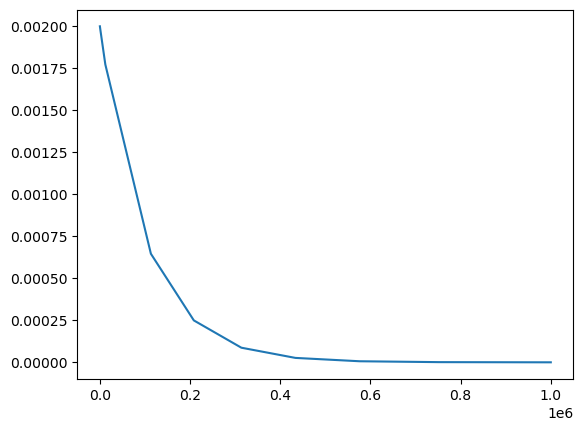

In [27]:
t_0 = 0  #seconds 
t_stop = 1000000  #seconds
d_m = 10e-9  # m - d_membrane
# Давайте засимулируем калий (K), для него:
# Возьмем начальную разность концентраций в 2 миллимоль
K_start = 0.002  #mole
# Его параметры следующие
z_K = 1
D_K = 1e-5  # m^2 / c - значение по порядку совпадает с реальными, предположим что он не зависит от температуры и состав цитоплазмы не меняется
epsilon = 1e6  # Нижняя граница по порядку на низких частотах
T = 300  # И моделирование будет происходить при комнатной температуре

sol = RK45(partial(dX_dt,
                    d_membrane=d_m,
                    z_X=z_K,
                    D_X = D_K,
                    epsilon=epsilon),
            t_0,
            [K_start],
            t_stop
        )
t_lst = []
X_lst = []
while sol.status == "running":
    sol.step()
    t_lst.append(sol.t)
    X_lst.append(sol.y)
    if(sol.y == 0):
        break

plt.plot(t_lst, X_lst)

Вычислим из полученных значений, время, за которое дисбалланс концентраций ионов уменьшится в е раз

In [32]:
t_relax = t_lst[np.where(X_lst < K_start / np.exp(1))[0][0]]
print("Время затухания:", t_relax, "c")

Время затухания: 113098.04102964257


Получившееся характерное время затухания выглядит нереалистично большим, причины тому могут быть две:
- Неверно выбранные коэффициэнты и значения для параметров клетки
- Слишком грубое приближение, не учитывающее изменение коэффициэнта самодиффузии и пространственное расположение ионов (расстояние их до мембраны)